In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [124]:
df = pd.read_csv("movies.csv",encoding ='latin1')

In [125]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [165]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


# Analyzing Movies From the Past 31 Years

Thousands of movies have been released over the past 30+ years. Some have performed poorly,  some have received rewards, and some have been just okay. They play a large role in our culture and there are a number of questions we could attempt to answer about one of these nearly 7000 movies, but we will be focusing on 3:

**Does budget play a role in movie scores? What factors affect their gross? And if budget doesn't determine movie scores, what does?**

### Does Budget Play a Role in Movie Scores?

To answer our first question, let's begin by taking a look at the general budget of films. (Unfortunately, a large portion of film budgets were unprovided or unknown. As such, any portion of this analysis relating to budget has had these ~2000 movies removed.)

In [127]:
df_budget = df[df.budget !=0]

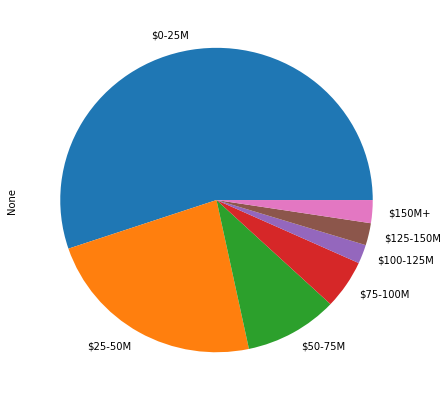

In [128]:
#budget pie chart
df['bins'] = pd.cut(df['budget'],bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,300000000], labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_budget = df.groupby('bins').size()
pie_budget.plot.pie(figsize=(7,7))
plt.show()

You can see from this pie chart that more than half of movie have a budget less than \$25 million, nearly a quarter receive \$25-50 million, and only a small portion use a budget greater than \$150 million.

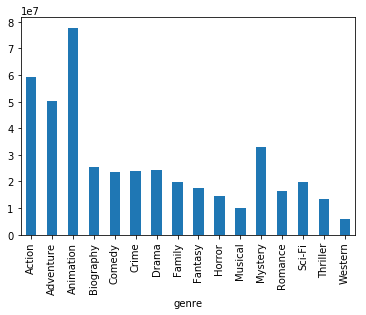

In [129]:
#genre/score
df_budget.groupby('genre').budget.mean().plot(kind = "bar")
plt.show()

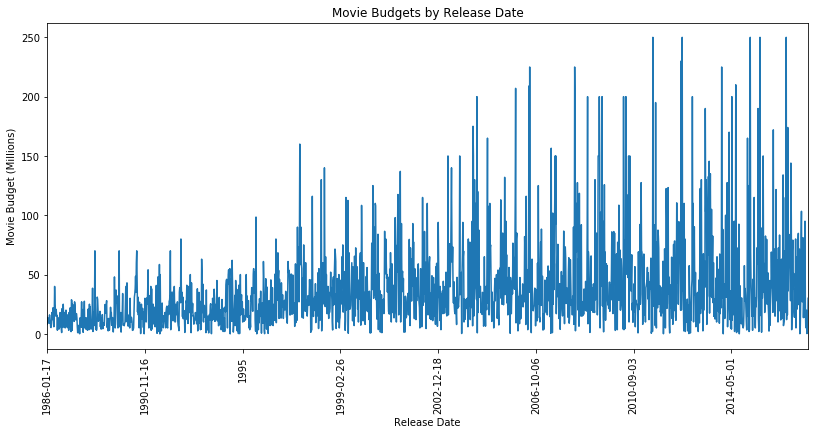

In [144]:
#release date/budget
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df_budget.groupby('released').budget.mean().plot(kind = "line")
plt.xlabel('Release Date')
plt.ylabel('Movie Budget (Millions)')
plt.title('Movie Budgets by Release Date')
tick_val = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
tick_lab = ['0','50', '100', '150', '200', '250'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

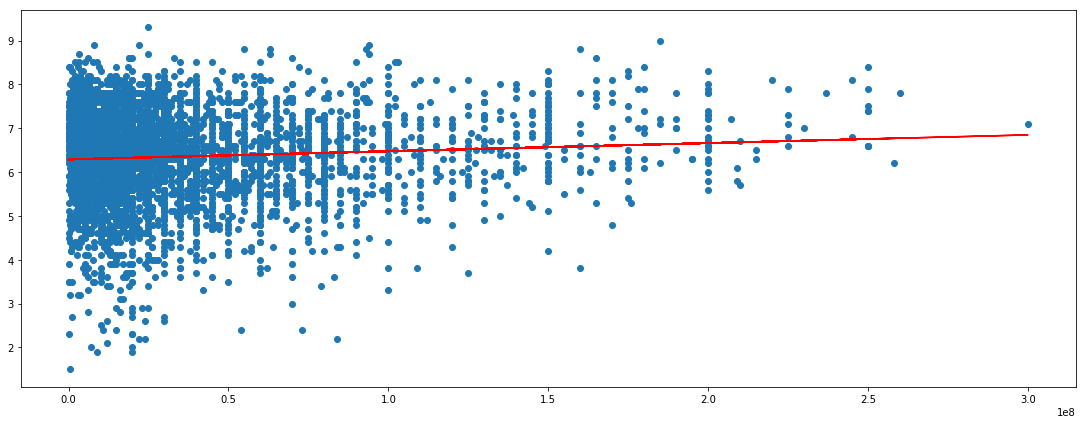

In [130]:
#budget/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["score"])

x= df_budget["budget"]
y = df_budget["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()

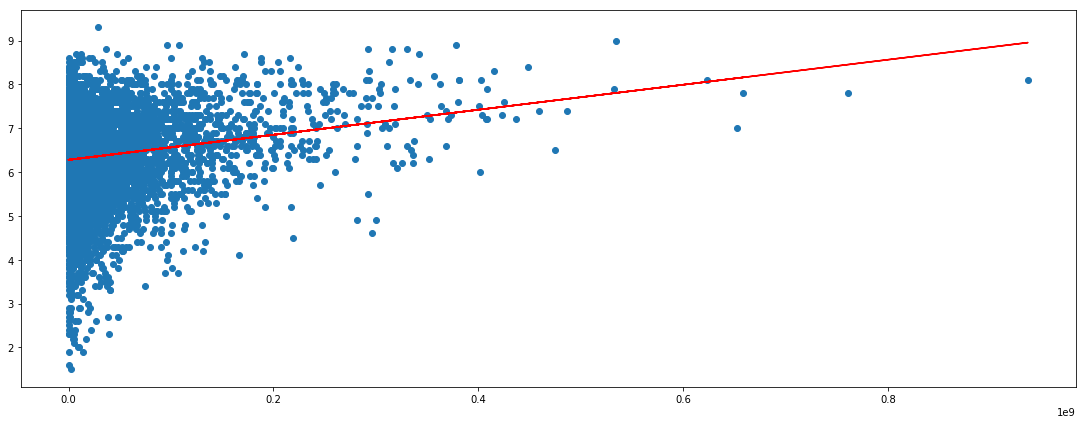

In [154]:
#gross/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df["gross"], df["score"])

x= df["gross"]
y = df["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()

### What Does Determine Movie Scores?

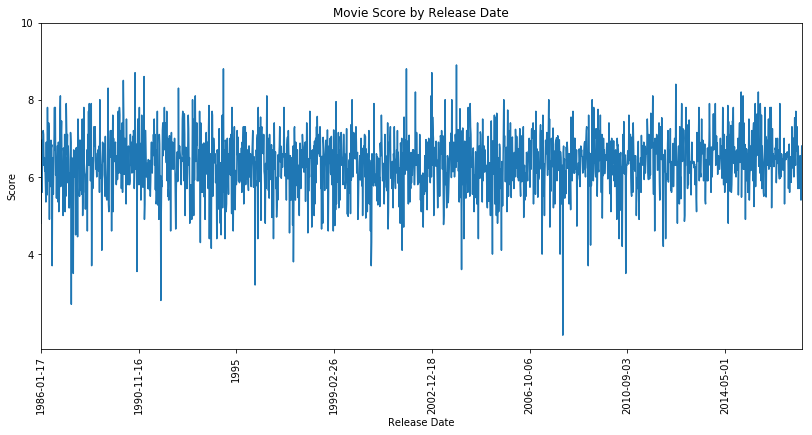

In [152]:
#release date/score
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df_budget.groupby('released').score.mean().plot(kind = "line")
plt.xlabel('Release Date')
plt.ylabel('Score')
plt.title('Movie Score by Release Date')
tick_val = [4, 6, 8, 10]
tick_lab = ['4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

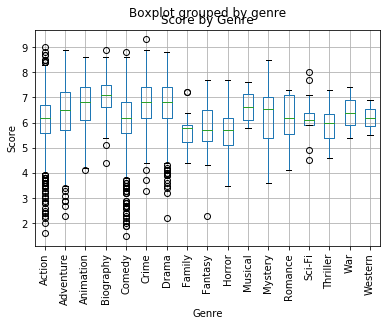

In [132]:
#genre/score boxplot
df.boxplot(column = 'score', by = 'genre')
plt.title("Score by Genre")
plt.ylabel('Score')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

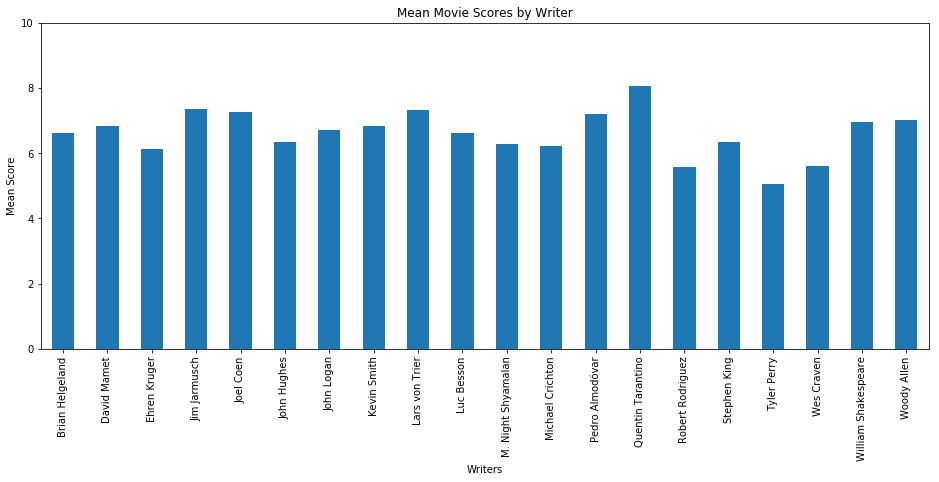

In [135]:
#create new dataframe including: writer, mean score, and count
df2 = df.groupby('writer').mean()['score'].reset_index()
df3 = df.writer.value_counts().reset_index().rename(columns={'index': 'writerz', 'writer': 'count'})
df3 = df3.sort_values(by ='writerz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['writerz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_writers = df4.reset_index(drop=True)
df_writers = df4_writers[df4_writers['count']>9]

#bar chart of writer/score
plt.figure(figsize=(35,6))
plt.subplot(1, 2, 1)
df_writers.groupby('writer').score.mean().plot(kind = "bar")
plt.xlabel('Writers')
plt.ylabel('Mean Score')
plt.title('Mean Movie Scores by Writer')
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

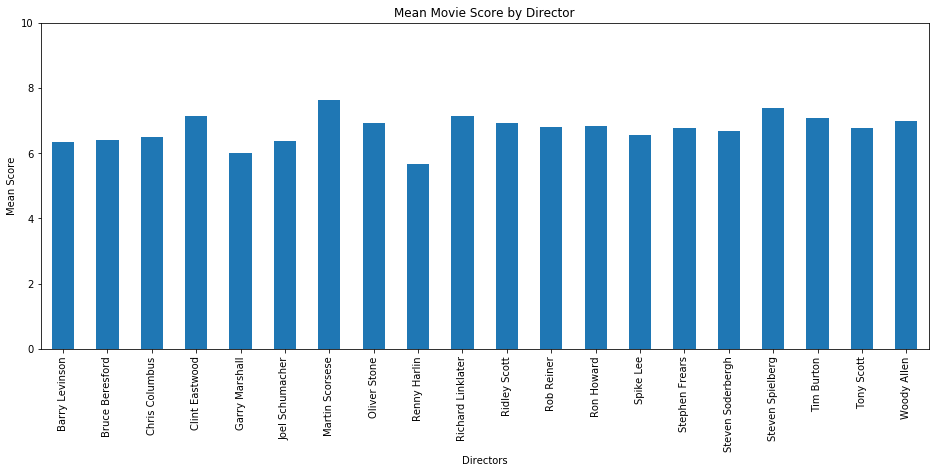

In [136]:
#create new dataframe including: director, mean score, and count
df2 = df.groupby('director').mean()['score'].reset_index()
df3 = df.director.value_counts().reset_index().rename(columns={'index': 'directorz', 'director': 'count'})
df3 = df3.sort_values(by ='directorz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['directorz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_directors = df4.reset_index(drop=True)
df_directors = df4_directors[df4_directors['count']>14]

#bar chart of director/score
plt.figure(figsize=(35,6))
plt.subplot(1, 2, 1)
df_directors.groupby('director').score.mean().plot(kind = "bar")
plt.xlabel('Directors')
plt.ylabel('Mean Score')
plt.title('Mean Movie Score by Director')
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

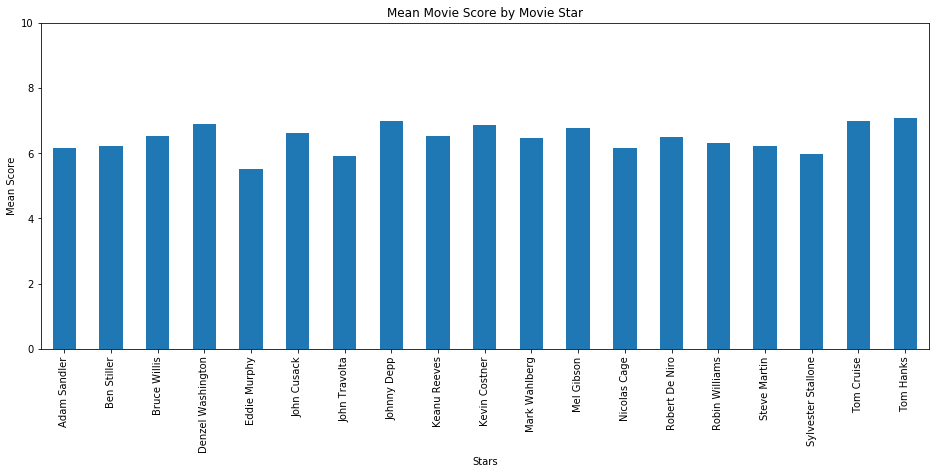

In [137]:
#create new dataframe including: star, mean score, and count
df2 = df.groupby('star').mean()['score'].reset_index()
df3 = df.star.value_counts().reset_index().rename(columns={'index': 'starz', 'star': 'count'})
df3 = df3.sort_values(by ='starz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['starz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_stars = df4.reset_index(drop=True)
df_stars = df4_stars[df4_stars['count']>22]

#bar chart of star/score
plt.figure(figsize=(35,6))
plt.subplot(1, 2, 1)
df_stars.groupby('star').score.mean().plot(kind = "bar")
plt.xlabel('Stars')
plt.ylabel('Mean Score')
plt.title('Mean Movie Score by Movie Star')
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

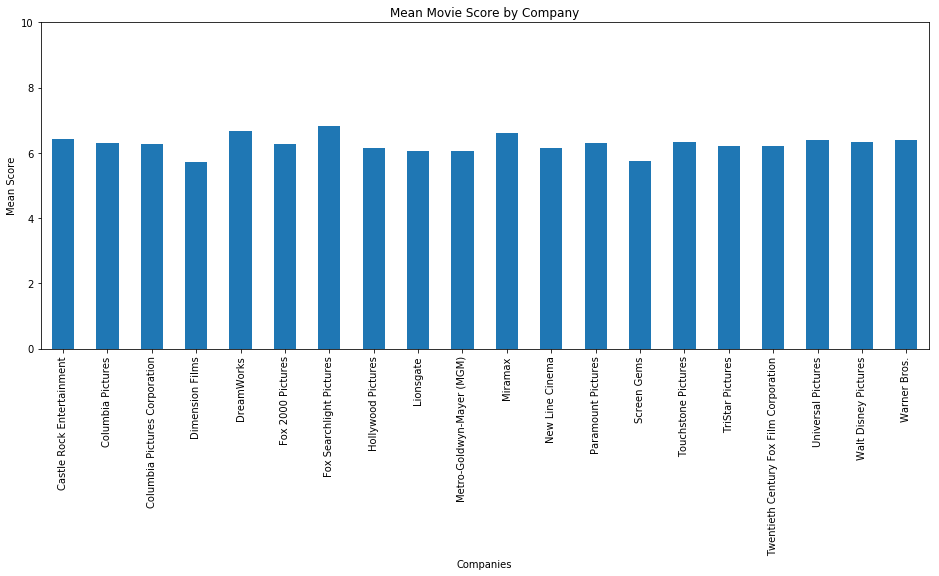

In [155]:
#create new dataframe including: company, mean score, and count
df2 = df.groupby('company').mean()['score'].reset_index()
df3 = df.company.value_counts().reset_index().rename(columns={'index': 'companyz', 'company': 'count'})
df3 = df3.sort_values(by ='companyz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['companyz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_companys = df4.reset_index(drop=True)
df_companys = df4_companys[df4_companys['count']>40]

#bar chart of company/score
plt.figure(figsize=(35,6))
plt.subplot(1, 2, 1)
df_companys.groupby('company').score.mean().plot(kind = "bar")
plt.xlabel('Companies')
plt.ylabel('Mean Score')
plt.title('Mean Movie Score by Company')
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

### What Factors Affect Movie Gross?

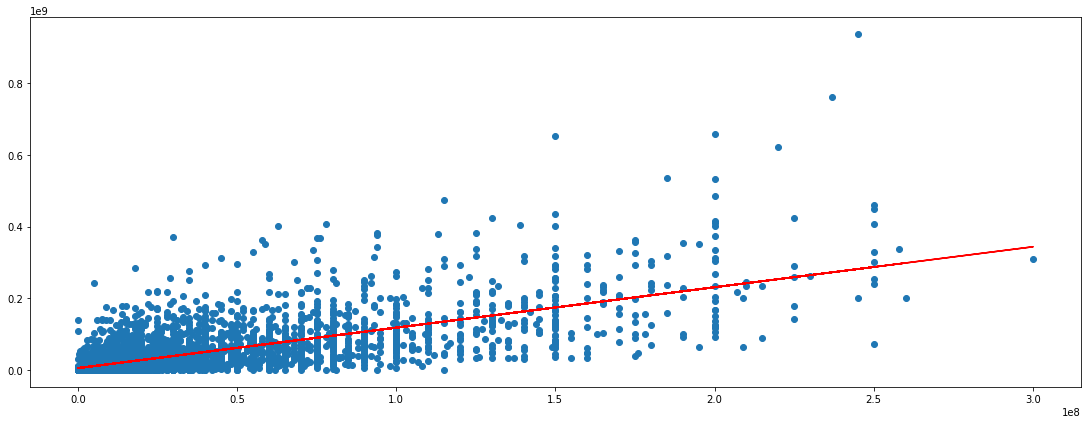

In [157]:
#budget/gross scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["gross"])

x= df_budget["budget"]
y = df_budget["gross"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()

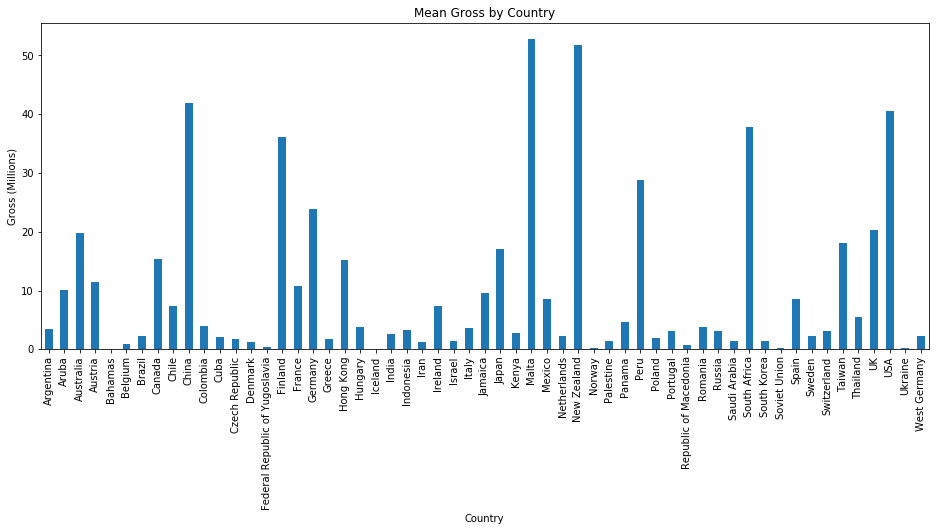

In [179]:
#gross/country
plt.figure(figsize=(35,6))
plt.subplot(1, 2, 1)
df.groupby('country').gross.mean().plot(kind = "bar")
plt.xlabel('Country')
plt.ylabel('Gross (Millions)')
plt.title('Mean Gross by Country')
tick_val = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_lab = ['0','10', '20', '30', '40', '50'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

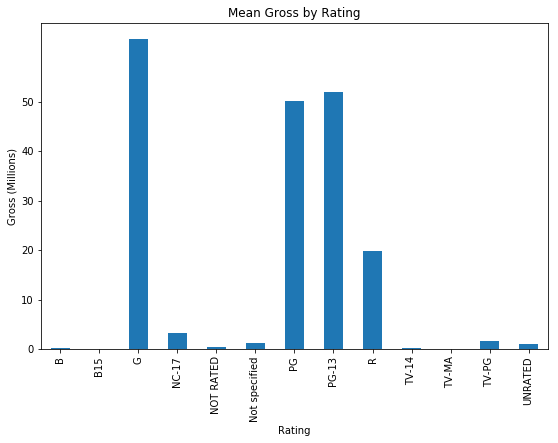

In [189]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
df.groupby('rating').gross.mean().plot(kind = "bar")
plt.xlabel('Rating')
plt.ylabel('Gross (Millions)')
plt.title('Mean Gross by Rating')
tick_val = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_lab = ['0','10', '20', '30', '40', '50'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

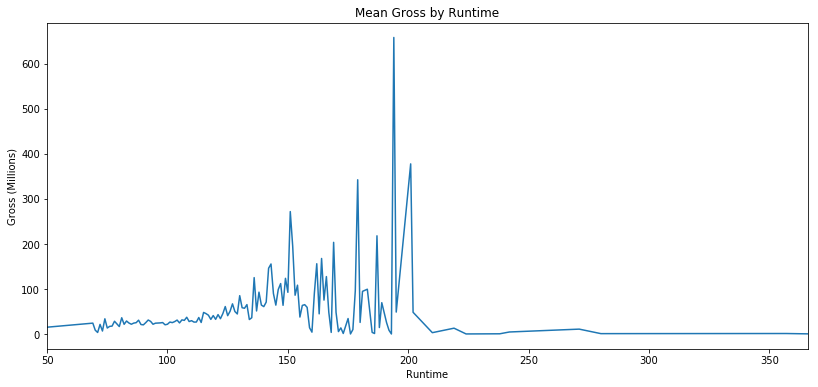

In [191]:
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df.groupby('runtime').gross.mean().plot(kind = "line")
plt.xlabel('Runtime')
plt.ylabel('Gross (Millions)')
plt.title('Mean Gross by Runtime')
tick_val = [0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000]
tick_lab = ['0','100', '200', '300', '400', '500', '600'] 
plt.yticks(tick_val, tick_lab)
plt.show()